<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/KC_Students_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import f_oneway

In [57]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/StudentsPerformance.csv")

In [58]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Data Conversion

In [70]:
def perform_eda(file_path):
    df = pd.read_csv(file_path)
    print("Columns in dataset:", df.columns)

In [71]:
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass

# Duplicates

In [62]:
    df.drop_duplicates(inplace=True)


# Columns

In [63]:
    df.drop(columns=[col for col in ['Unnamed: 0'] if col in df.columns], inplace=True)

# Missing Values

In [64]:
    df.fillna(df.median(numeric_only=True), inplace=True)
    df.fillna(df.mode().iloc[0], inplace=True)

# Encode Label

In [65]:
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = LabelEncoder().fit_transform(df[col])

# Outliers indentification

In [66]:
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        df = df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]

# Normalize

In [67]:
    df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

# ANNOVA

In [72]:
    possible_targets = ['math score', 'reading score', 'writing score']
    target = next((col for col in possible_targets if col in df.columns), None)
    if not target:
        raise KeyError("No valid target variable found in dataset.")

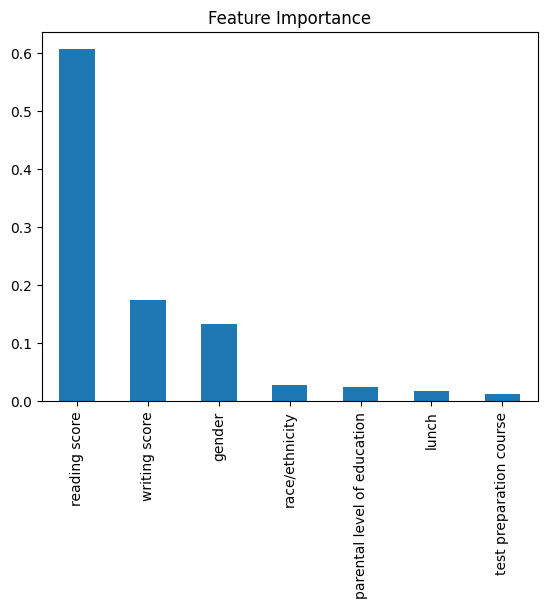

In [73]:
    features = df.drop(columns=[target])
    model = RandomForestRegressor().fit(features, df[target])
    pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
    plt.show()

    for col in df.select_dtypes(include=['int', 'object']).columns.drop(target, errors='ignore'):
        if df[col].nunique() > 1:
            print(f'ANOVA for {col}: p-value = {f_oneway(*[df[df[col] == val][target] for val in df[col].unique()])[1]}')

# Visualization

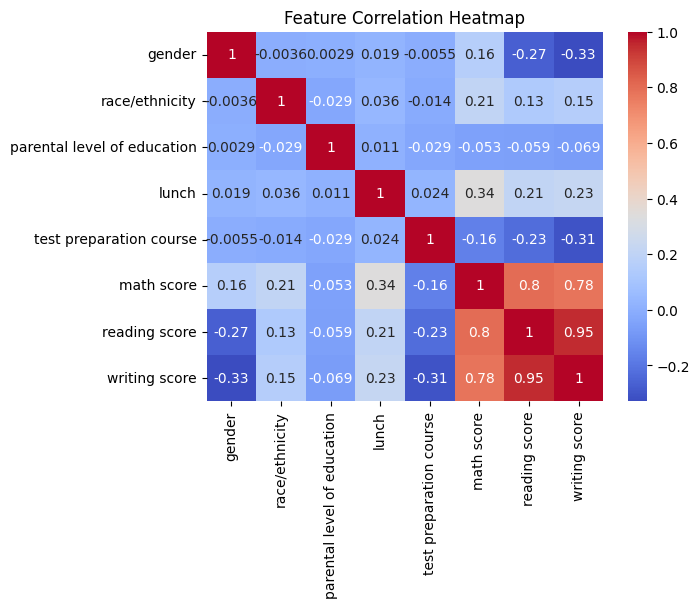

In [78]:
    #Visualize correlations
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()


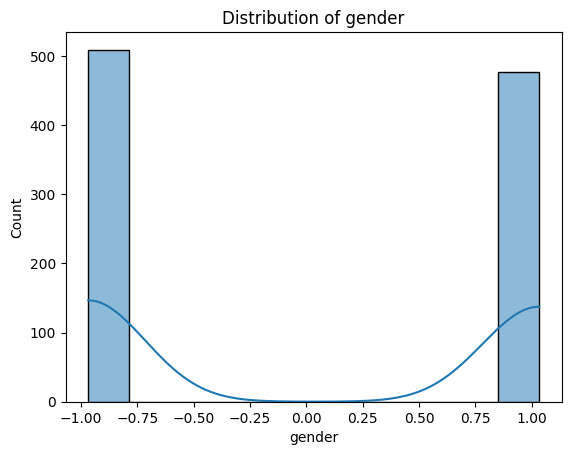

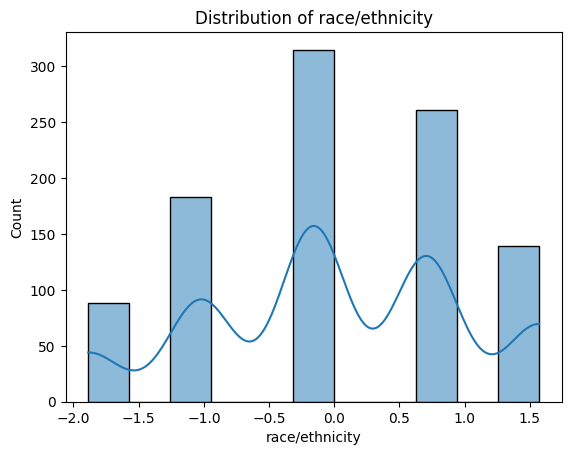

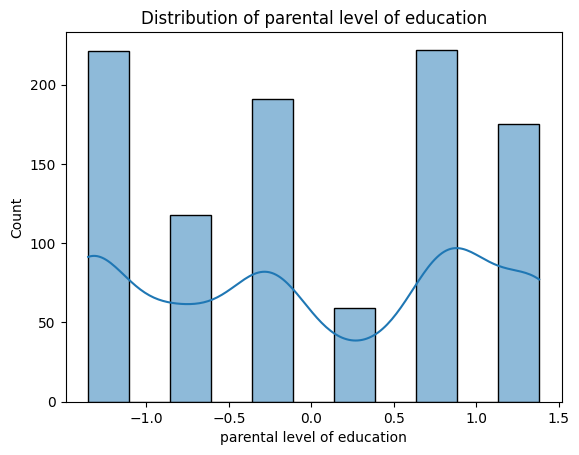

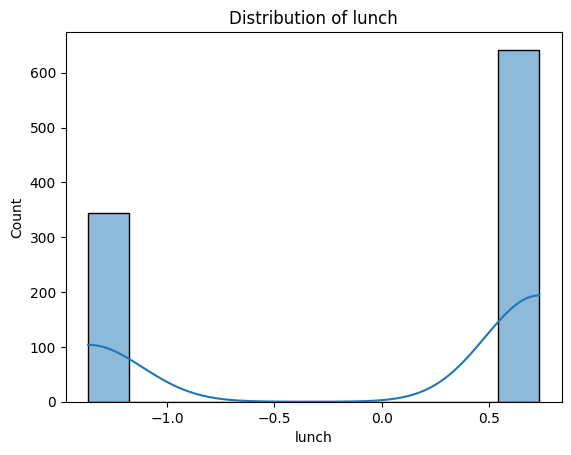

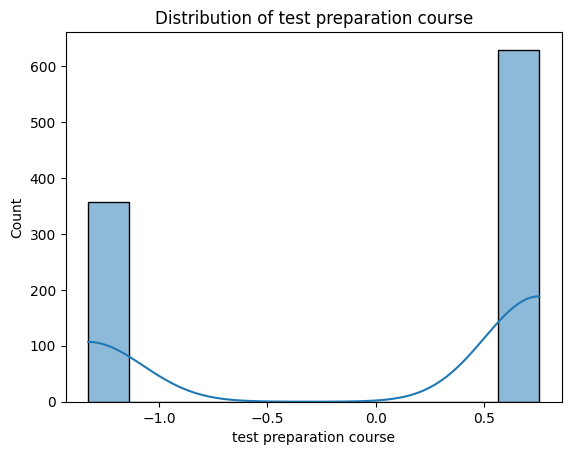

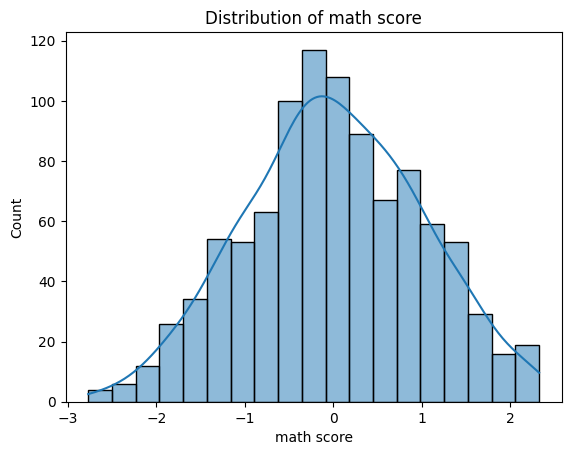

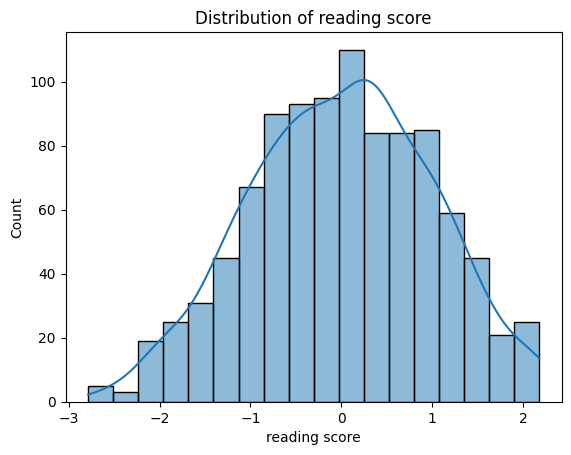

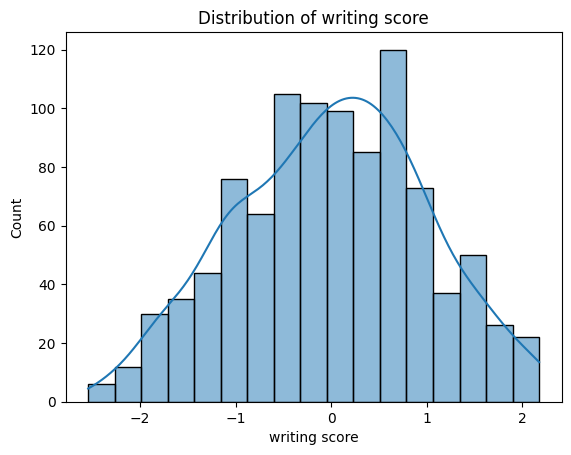

In [82]:
    # Distributions
    for col in numeric_cols:
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

    for col in df.select_dtypes(include=['int', 'object']).columns.drop(target, errors='ignore'):
        sns.boxplot(x=df[col], y=df[target])
        plt.title(f"Impact of {col} on {target}")
        plt.xticks(rotation=45)
        plt.show()